# 1.) Pull in Data and Convert ot Monthly

In [21]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]
df.head()


[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
1980-12-31,0.117887
1981-01-31,0.097591
1981-02-28,0.091546
1981-03-31,0.084637
1981-04-30,0.098023


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [36]:
df['Current Stock Price'] = df['Adj Close']
df['Price Difference'] = df['Adj Close'].diff()
df['Price Up'] = df['Price Difference'] > 0
df['Option Premium'] = 0.08 * df['Adj Close'].shift(1)
df

,Adj Close,Price Difference,Price Up,Option Premium,Current Stock Price
Date,,,,,
1980-12-31,0.117887,NaN,False,NaN,0.117887
1981-01-31,0.097591,-0.020296,False,0.009431,0.097591
1981-02-28,0.091546,-0.006045,False,0.007807,0.091546
1981-03-31,0.084637,-0.006909,False,0.007324,0.084637
1981-04-30,0.098023,0.013386,True,0.006771,0.098023
...,...,...,...,...,...
2023-09-30,170.984741,-16.638077,False,15.009825,170.984741
2023-10-31,170.545319,-0.439423,False,13.678779,170.545319
2023-11-30,189.949997,19.404678,True,13.643625,189.949997


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [37]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])
X

,VAR1
Date,
1980-12-31,0.163261
1981-01-31,0.437449
1981-02-28,-0.334994
1981-03-31,2.550820
1981-04-30,3.170655
...,...
2023-05-31,2.330573
2023-06-30,3.033257
2023-07-31,1.007072


In [32]:
y = df.loc[:"2023-09-30","Price Up"].copy()

In [33]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
logreg = LogisticRegression().fit(X_normalized, y)

# 4.) Add columns, prediction and profits.

In [39]:
option_premium_percentage = 0.08
X['Prediction'] = logreg.predict(X_normalized)
X['Profit'] = np.where(X['Prediction'] == 1,
                                  option_premium_percentage * df.iloc[:514]['Current Stock Price'],
                                  -100 * df.iloc[:514]['Price Difference'] + option_premium_percentage * df.iloc[:514]['Current Stock Price'])
X


,VAR1,Prediction,Profit
Date,,,
1980-12-31,0.163261,True,0.009431
1981-01-31,0.437449,True,0.007807
1981-02-28,-0.334994,True,0.007324
1981-03-31,2.550820,True,0.006771
1981-04-30,3.170655,True,0.007842
...,...,...,...
2023-05-31,2.330573,True,14.142245
2023-06-30,3.033257,True,15.476285
2023-07-31,1.007072,True,15.674156


# 5.) Plot profits over time

In [ ]:
My skills are valuable to PJ/Philp Liu in several ways. The guest speaker says conventional high-frequency traders have done well in cryptocurrencies. With financial engineering and HFT expertise I may build trading strategies, analyze market data, and create cryptocurrency and blockchain-based asset financial models.

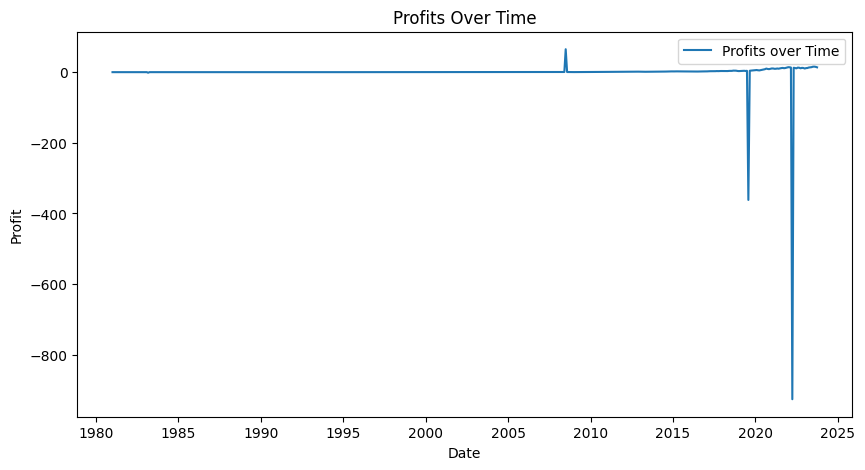

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(X.index, X['Profit'], label='Profits over Time')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Profits Over Time')
plt.legend()
plt.show()


# 6.) Create a loop that stores total profits over time

In [50]:
thresholds = np.arange(0, 1, 0.01)
total_profits = []
for threshold in np.arange(0, 1, 0.01):
    predictions = (X['VAR1'] > threshold)
    cm = metrics.confusion_matrix(X['Prediction'], predictions)
    tn, fp, fn, tp = cm.ravel()
    true_positive_profit = X.loc[(predictions) & (X['Prediction']), 'Profit'].sum()
    true_negative_profit = X.loc[(~predictions) & (~X['Prediction']), 'Profit'].sum()
    total_profit = tp * true_positive_profit + tn * true_negative_profit
    total_profits.append(total_profit)
total_profits

[349905.21743156126,
 349905.21743156126,
 348434.99158862594,
 348434.99158862594,
 348434.99158862594,
 347687.75570421584,
 346952.01950396906,
 345486.68130455975,
 343806.6531699282,
 343074.9305480063,
 340058.4279401041,
 337849.21892040677,
 337849.21892040677,
 337086.0990277672,
 333156.64304194576,
 332431.47870858613,
 331699.95834602125,
 330976.77344115084,
 326997.22956948285,
 316279.83731641364,
 313863.6963365835,
 311029.952650264,
 309614.50771852495,
 308910.0001082719,
 305882.69745667075,
 301820.5439097327,
 300902.9813720748,
 300090.8229960991,
 294088.0204179651,
 293399.5067494902,
 293399.5067494902,
 292708.132147187,
 292019.6975755683,
 289966.2999651981,
 287629.0889748711,
 286948.28826413065,
 285847.9478745091,
 284903.56843608234,
 281874.25988785276,
 280510.2291736263,
 279153.1607883155,
 279153.1607883155,
 271719.22227255884,
 265804.48135208286,
 264496.97174514626,
 263838.20975636906,
 261151.03218512388,
 260495.81371122896,
 252678.8650078

# 7.) What is the optimal threshold and plot the total profits for this model.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


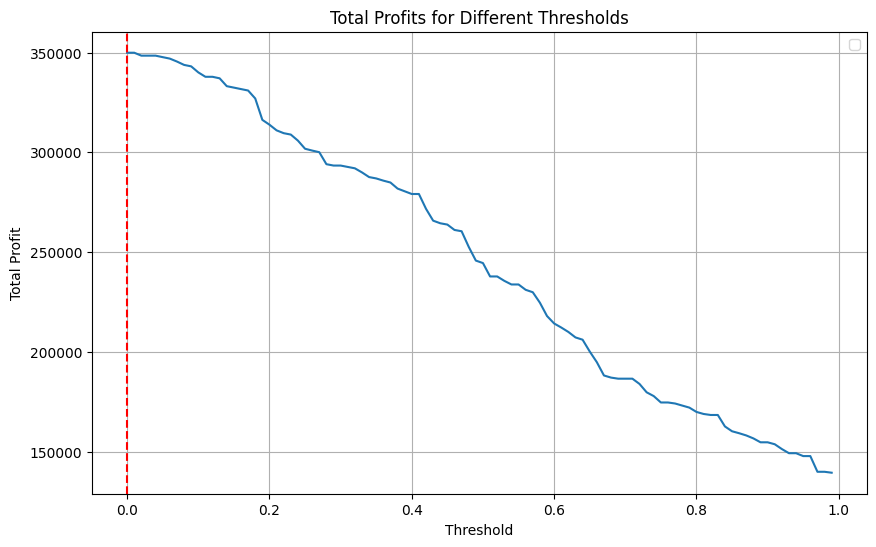

In [51]:
max_profit = max(total_profits)
optimal_threshold = thresholds[total_profits.index(max_profit)]
plt.figure(figsize=(10, 6))
plt.plot(thresholds, total_profits)
plt.title('Total Profits for Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Total Profit')
plt.grid(True)
plt.axvline(x=optimal_threshold, color='r', linestyle='--')
plt.legend()
plt.show()
